# Додаткові завдання №5

## 1 Задача 1.10.10
Випадкова величина $\xi$ має щiльнiсть $p(x) = e^{-2 |x|}$.
Обчислити
1. $\mathsf{P}(\xi < 1)$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)$;
3. $\mathsf{E}\xi, \mathsf{D}\xi$.

### 1.1 Завдання 1
Реалізуйте випадкову величину $\xi$ за допомогою класу [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [1]:
from scipy.stats import rv_continuous
import numpy as np
import matplotlib.pyplot as plt

class E(rv_continuous):
    def _pdf(self, x):
        return np.exp(-2*np.abs(x))


### 1.2 Завдання 2
Зобразіть графічно функцію щільності та функцію розподілу отриманої випадкової величини.

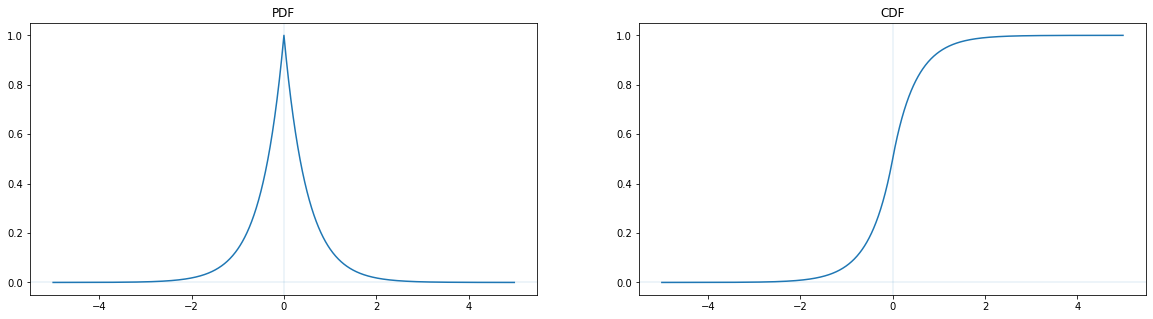

In [2]:
def axes(ind):
    ax[ind].axvline(0, alpha=.1)
    ax[ind].axhline(0, alpha=.1)

x = np.arange(-5, 5, 0.01)
fig, ax = plt.subplots(1, 2, figsize=(20,5))

prob = E(name='prob')

y = prob._pdf(x)
ax[0].plot(x, y)
axes(0)
ax[0].set_title("PDF")
y = prob.cdf(x)
ax[1].plot(x, y)
axes(1)
ax[1].set_title("CDF")
plt.show()



### 1.3 Завдання 3
Розв'яжіть задачу за допомогою отриманої випадкової величини та порівняйте результати з теоретично розрахованими.

In [3]:
from sympy import*
from sympy.abc import k

f = exp(-2*abs(k))

print('P(e<1):')
print(f'За допомогою отриманої випадкової величини {prob.cdf(1)}')
print(f'Теоретично розраховані {(integrate(f,(k,-oo,0))+integrate(f,(k,0,1))).evalf()}\n')

print('P(e<3|e>=2):')
print(f'За допомогою отриманої випадкової величини {prob.cdf(3) - prob.cdf(2)}')
print(f'Теоретично розраховані {(integrate(f,(k,2,3))).evalf()}\n')

print('Мат сподівання:')
print(f'За допомогою отриманої випадкової величини {prob.expect()}')
print(f'Теоретично розраховані {(integrate(k*f,(k,-oo,oo))).evalf()}\n')

print('Дисперсія:')
print(f'За допомогою отриманої випадкової величини {prob.var()}')
print(f'Теоретично розраховані {(integrate(k**2*f,(k,-oo,oo)) - integrate(k*f,(k,-oo,oo))**2).evalf()}\n')

P(e<1):
За допомогою отриманої випадкової величини 0.9323323583816931
Теоретично розраховані 0.932332358381694

P(e<3|e>=2):
За допомогою отриманої випадкової величини 0.007918443356022653
Теоретично розраховані 0.00791844335603391

Мат сподівання:
За допомогою отриманої випадкової величини 0.0
Теоретично розраховані 0

Дисперсія:


c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


За допомогою отриманої випадкової величини 0.500001340084332
Теоретично розраховані 0.500000000000000



## 2 Апроксимація числа $\pi$ (задача Бюффона)

Розглянемо дві паралельні прямі на площині, відстань між якими дорівнює $1$. Не втрачаючи загальності, нехай ці прямі задаються рівностями $y = 0$ та $y = 1$. Кинемо на цю площину голку довжиною $1$ так, що координата по осі $y$ її середини рівномірно розподілена на $[0,1]$, а кут між голкою та віссю $x$ (додатною піввіссю $x$) рівномірно розподілений на $[0, \pi]$. Тоді ймовірність того, що голка перетне будь-яку з паралельних прямих, дорівнює $2/\pi$.

Реалізуйте функцію емпіричної апроксимації числа $\pi$ за $n$ симуляцій (кидання $n$ голок). Зобразіть графічно отримані елементи: паралельні прямі та всі голки. Виділіть точки, що належать колу, окремим кольором від інших точок.

Виведіть результат функції для:
1. $n = 10$
2. $n = 100$
3. $n = 500$
4. $n = 1000$

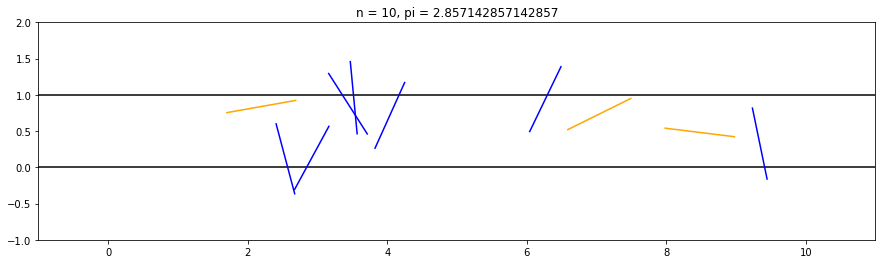

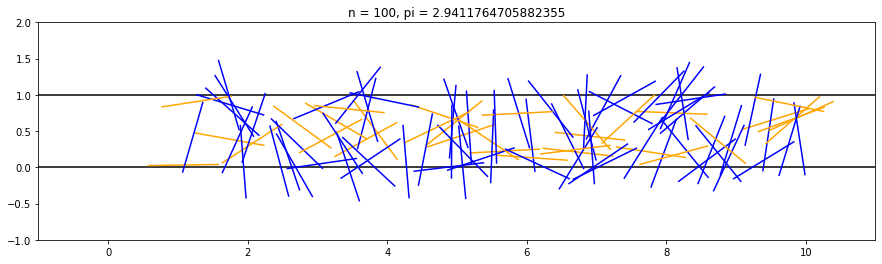

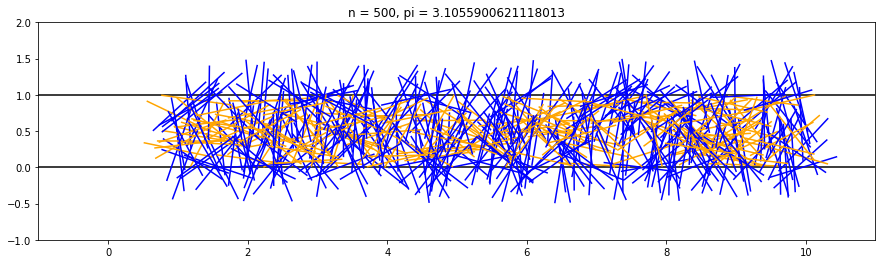

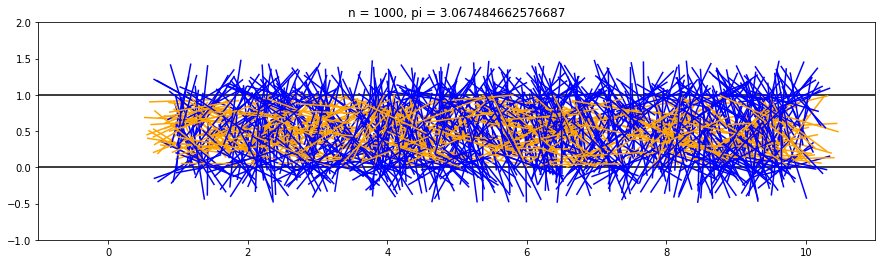

In [62]:
from scipy.stats import uniform

lst = [10, 100 , 500 , 1000]
a = 1
loc, scale = 0, a*2
x = np.linspace(0,scale, 1000)

def a(x):
    return 0.5*np.sin(x)

def b(x):
    return 0.5*np.cos(x)

for n in lst:
    hits = 0
    fig, ax = plt.subplots(figsize=(15,4))
    ax.set_xlim(-1,11)
    ax.set_ylim(-1,2)
    x, y = np.meshgrid(np.linspace(-1,11,1000),np.linspace(0,1,1000))
    ax.plot(np.linspace(-1,11,1000),np.linspace(0,0,1000), 'k-')
    ax.plot(np.linspace(-1,11,1000),np.linspace(1,1,1000), 'k-')
    for i in range(n):
        y = uniform.rvs(0,1,size=1)
        k = uniform.rvs(0,np.pi,size=1)
        x0 = uniform.rvs(1,9,size=1)
        y_l = np.linspace(y-0.5,y+0.5,5)
        x_l = np.linspace(y-0.5,y+0.5,5)
        x1, y1 = a(k), b(k)
        if y+y1 >= 1 or y+y1 <= 0 or y-y1 >= 1 or y-y1 <= 0:
            ax.plot([x0-x1,x0+x1], [y-y1, y+y1], color = 'b')
            hits += 1
        else:
            ax.plot([x0-x1,x0+x1], [y-y1, y+y1], color = 'orange')
    ax.set_title(f'n = {n}, pi = {2*n/hits}')
    plt.show()